In [3]:
# Uploading qns and answers
import pandas as pd

QUESTION_PATH ="../data/general_questions_with_answers_new.csv"

questions = pd.read_csv(QUESTION_PATH, encoding='latin1')
questions.head(1)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,full_text,is_code_present,no_of_ans
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,I've written a database generation script in S...,1,3


In [4]:
%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

In [5]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [6]:
# Defining stop words
# Define stopwords
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'contain', 'containing', 'contains', 'could', 'couldnt', 'd', 'date', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', 'done', "don't", 'down', 'downwards', 'due', 'during', 'e', 'each', 'ed', 'edu', 'effect', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'especially', 'et', 'et - al', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'except', 'f', 'far', 'few', 'ff', 'fifth', 'first', 'five', 'fix', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'found', 'four', 'from', 'further', 'furthermore', 'g', 'gave', 'get', 'gets', 'getting', 'give', 'given', 'gives', 'giving', 'go', 'goes', 'gone', 'got', 'gotten', 'h', 'had', 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', 'hed', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'heres', 'hereupon', 'hers', 'herself', 'hes', 'hi', 'hid', 'him', 'himself', 'his', 'hither', 'home', 'how', 'howbeit', 'however', 'hundred', 'i', 'id', 'ie', 'if', "i'll", 'im', 'immediate', 'immediately', 'importance', 'important', 'in', 'inc', 'indeed', 'index', 'information', 'instead', 'into', 'invention', 'inward', 'is', "isn't", 'it', 'itd', "it'll", 'its', 'itself', "i've", 'j', 'just', 'k', 'keep\tkeeps', 'kept', 'kg', 'km', 'know', 'known', 'knows', 'l', 'largely', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'lets', 'like', 'liked', 'likely', 'line', 'little', "'ll", 'look', 'looking', 'looks', 'ltd', 'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', 'me', 'mean', 'means', 'meantime', 'meanwhile', 'merely', 'mg', 'might', 'million', 'miss', 'ml', 'more', 'moreover', 'most', 'mostly', 'mr', 'mrs', 'much', 'mug', 'must', 'my', 'myself', 'n', 'na', 'name', 'namely', 'nay', 'nd', 'near', 'nearly', 'necessarily', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'nor', 'normally', 'nos', 'not', 'noted', 'nothing', 'now', 'nowhere', 'o', 'obtain', 'obtained', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'omitted', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'ord', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'owing', 'own', 'p', 'page', 'pages', 'part', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'poorly', 'possible', 'possibly', 'potentially', 'pp', 'predominantly', 'present', 'previously', 'primarily', 'probably', 'promptly', 'proud', 'provides', 'put', 'q', 'que', 'quickly', 'quite', 'qv', 'r', 'ran', 'rather', 'rd', 're', 'readily', 'really', 'recent', 'recently', 'ref', 'refs', 'regarding', 'regardless', 'regards', 'related', 'relatively', 'research', 'respectively', 'resulted', 'resulting', 'results', 'right', 'run', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'sec', 'section', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sent', 'seven', 'several', 'shall', 'she', 'shed', "she'll", 'shes', 'should', "shouldn't", 'show', 'showed', 'shown', 'showns', 'shows', 'significant', 'significantly', 'similar', 'similarly', 'since', 'six', 'slightly', 'so', 'some', 'somebody', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specifically', 'specified', 'specify', 'specifying', 'still', 'stop', 'strongly', 'sub', 'substantially', 'successfully', 'such', 'sufficiently', 'suggest', 'sup', 'sure\tt', 'take', 'taken', 'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that've", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'thered', 'therefore', 'therein', "there'll", 'thereof', 'therere', 'theres', 'thereto', 'thereupon', "there've", 'these', 'they', 'theyd', "they'll", 'theyre', "they've", 'think', 'this', 'those', 'thou', 'though', 'thoughh', 'thousand', 'throug', 'through', 'throughout', 'thru', 'thus', 'til', 'tip', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'ts', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'ups', 'us', 'use', 'used', 'useful', 'usefully', 'usefulness', 'uses', 'using', 'usually', 'v', 'value', 'various', "'ve", 'very', 'via', 'viz', 'vol', 'vols', 'vs', 'w', 'want', 'wants', 'was', 'wasnt', 'way', 'we', 'wed', 'welcome', "we'll", 'went', 'were', 'werent', "we've", 'what', 'whatever', "what'll", 'whats', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'wheres', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whim', 'whither', 'who', 'whod', 'whoever', 'whole', "who'll", 'whom', 'whomever', 'whos', 'whose', 'why', 'widely', 'willing', 'wish', 'with', 'within', 'without', 'wont', 'words', 'world', 'would', 'wouldnt', 'www', 'x', 'y', 'yes', 'yet', 'you', 'youd', "you'll", 'your', 'youre', 'yours', 'yourself', 'yourselves', "you've", 'z', 'zero']
python_stop_words = ['org', 'library', 'doc', 'will', 've', 'things', 'best', 'group', 'features', 'example', 'code', 'doesn', 'work', 'works', 'fine', 'don', 'help', 'appreciated', 'working', 'error', 'solve', 'problem', 'https', 'http']
stop_words.extend(python_stop_words)

# Converting into frozenset (sklearn requierement)
total_stop_words = frozenset(stop_words)

In [7]:
questions['full_text'] = questions['full_text'].astype(str)

In [8]:
try:
    questions['CreationDate'] = pd.to_datetime(questions['CreationDate'], format="%Y-%m-%dT%H:%M:%SZ", errors="coerce")
except Exception as err:
    print(err.args)

In [9]:
# Changing the data set index to date
questions = questions.set_index(['CreationDate'])

In [10]:
answered = questions[questions['no_of_ans'] > 3]
unanswered = questions[questions['no_of_ans'] == 0]

# Unanswered Questions 2015-2016

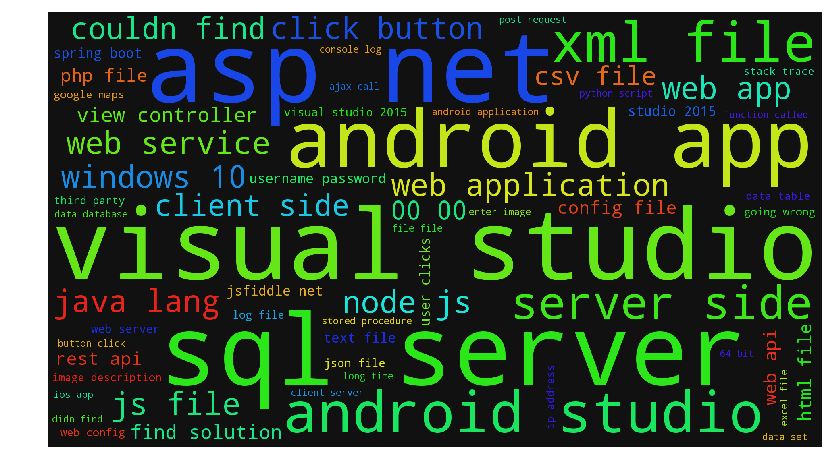

In [11]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = unanswered.loc['2015-10-15':'2016-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

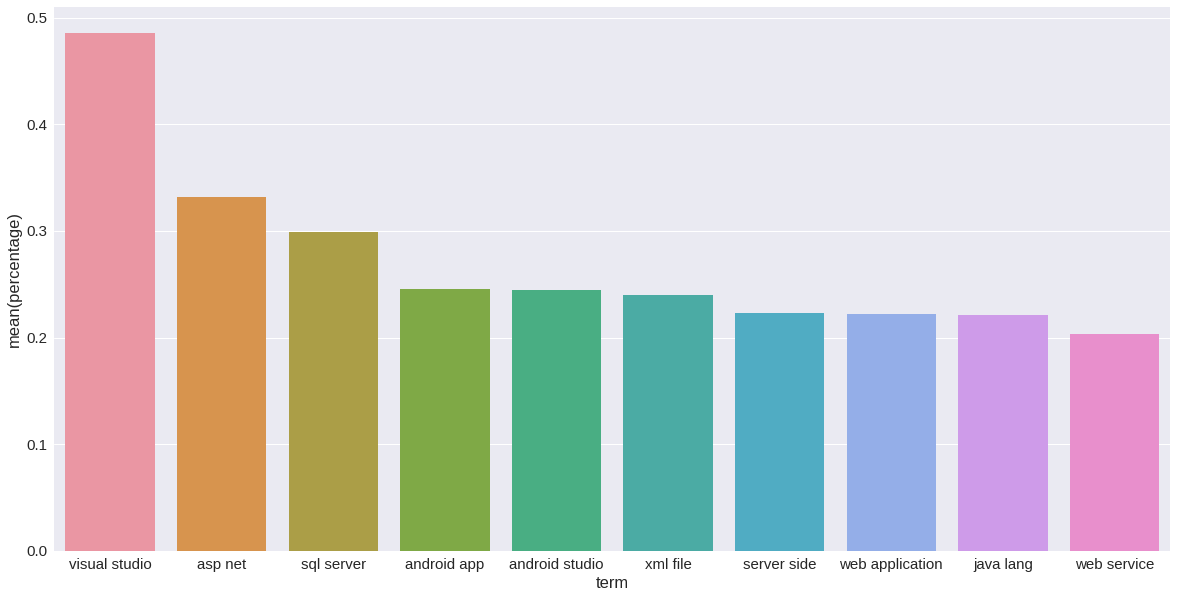

In [12]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Unanswered Questions 2014-2015

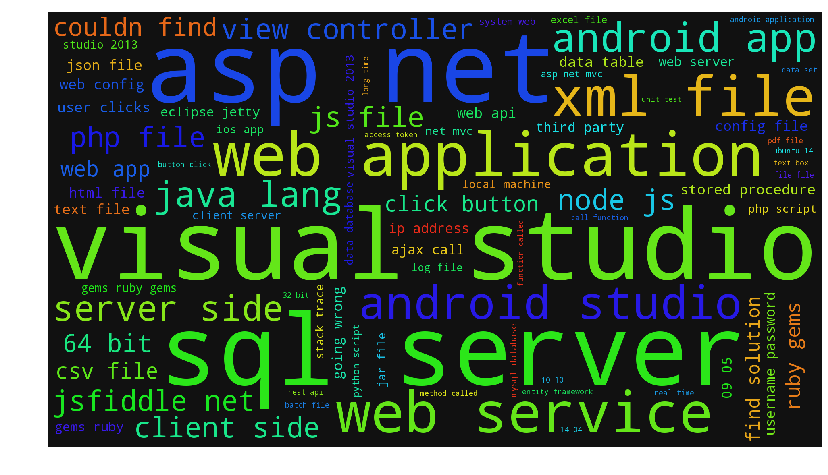

In [13]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = unanswered.loc['2014-10-15':'2015-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

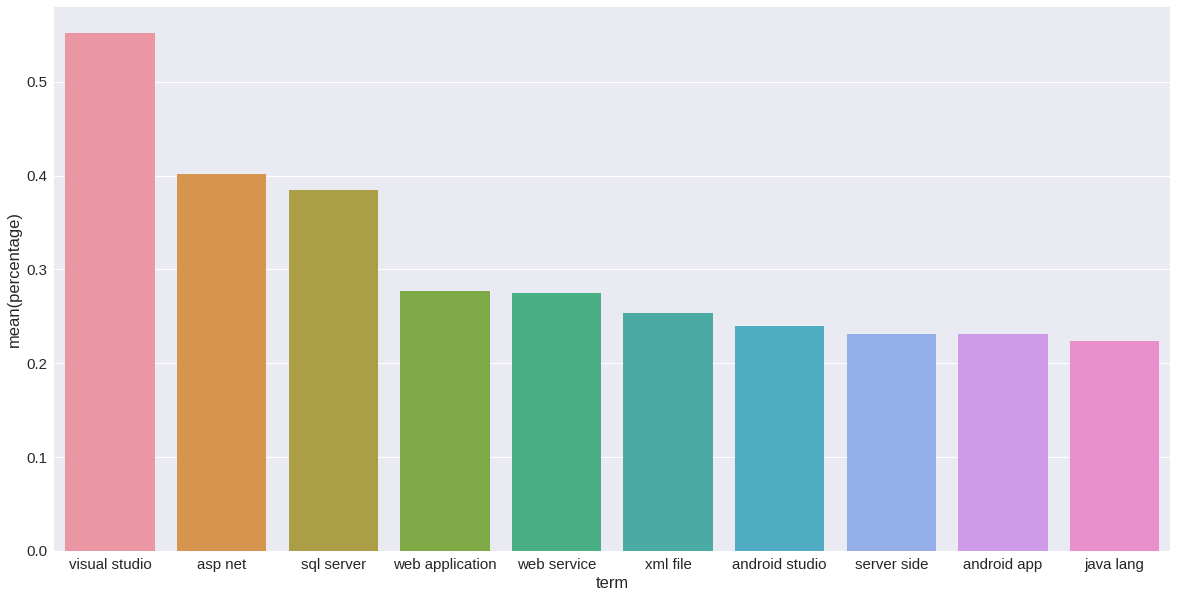

In [14]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Unanswered Questions 2013-2014

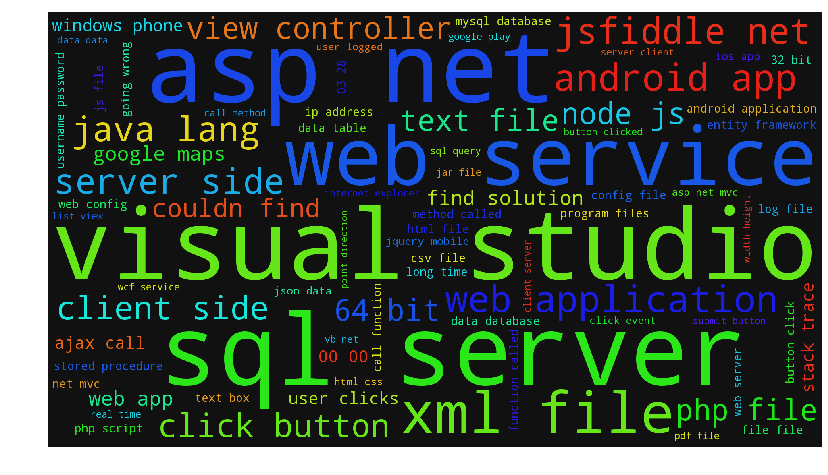

In [15]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = unanswered.loc['2013-10-15':'2014-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

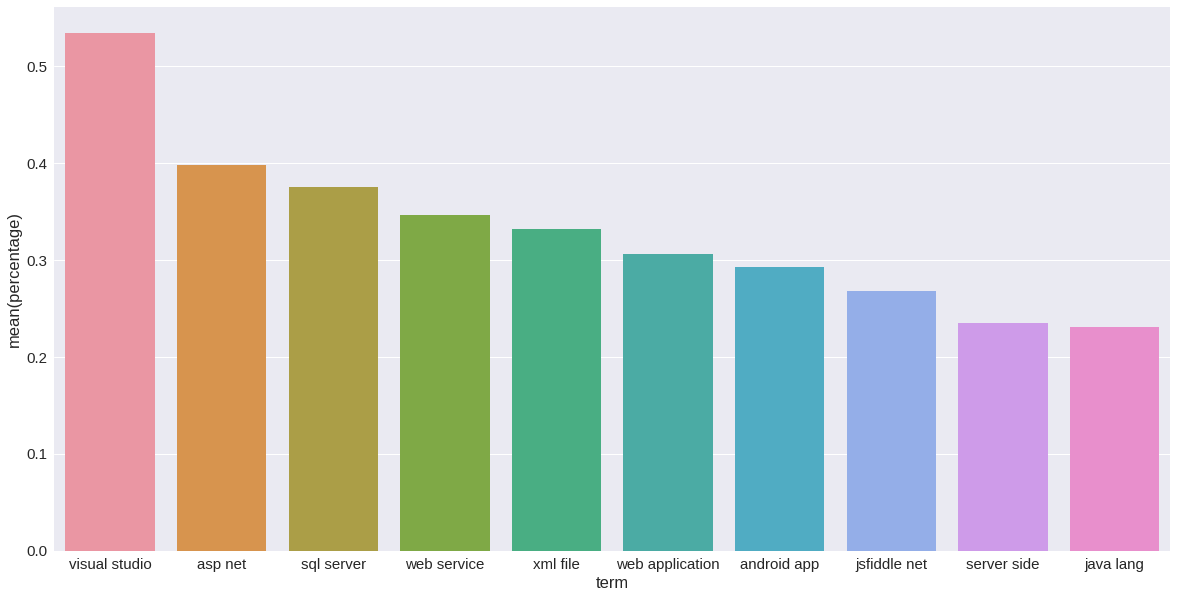

In [16]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Unanswered Questions 2012-2013

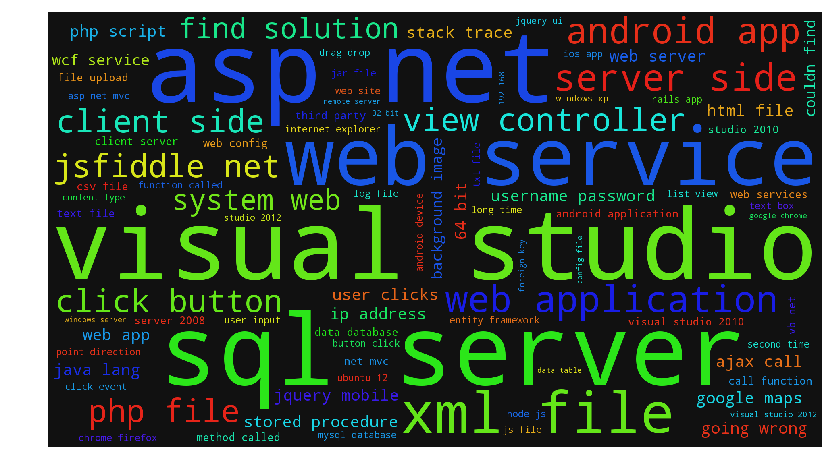

In [17]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = unanswered.loc['2012-10-15':'2013-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

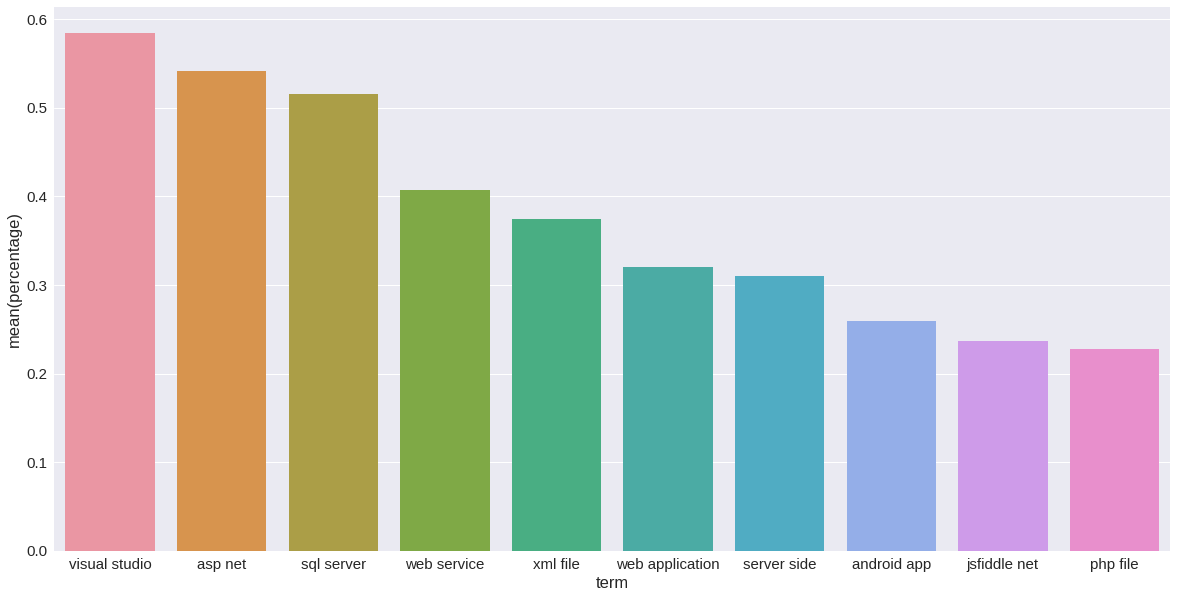

In [18]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Unanswered Questions 2011-2012

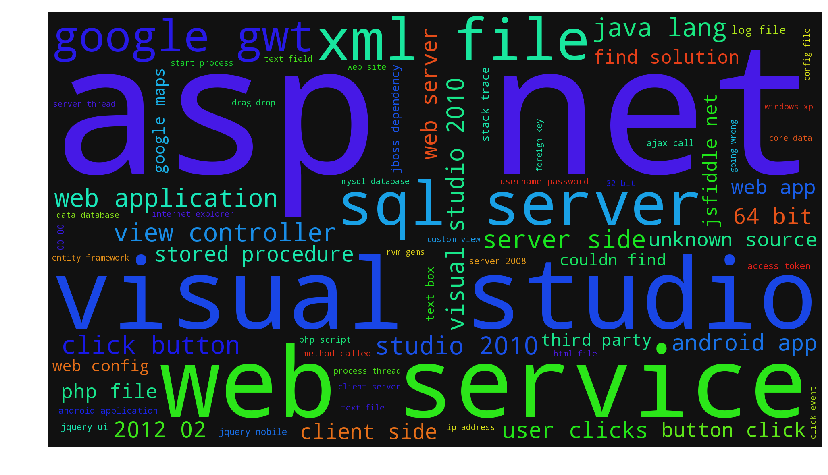

In [19]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = unanswered.loc['2011-10-15':'2012-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

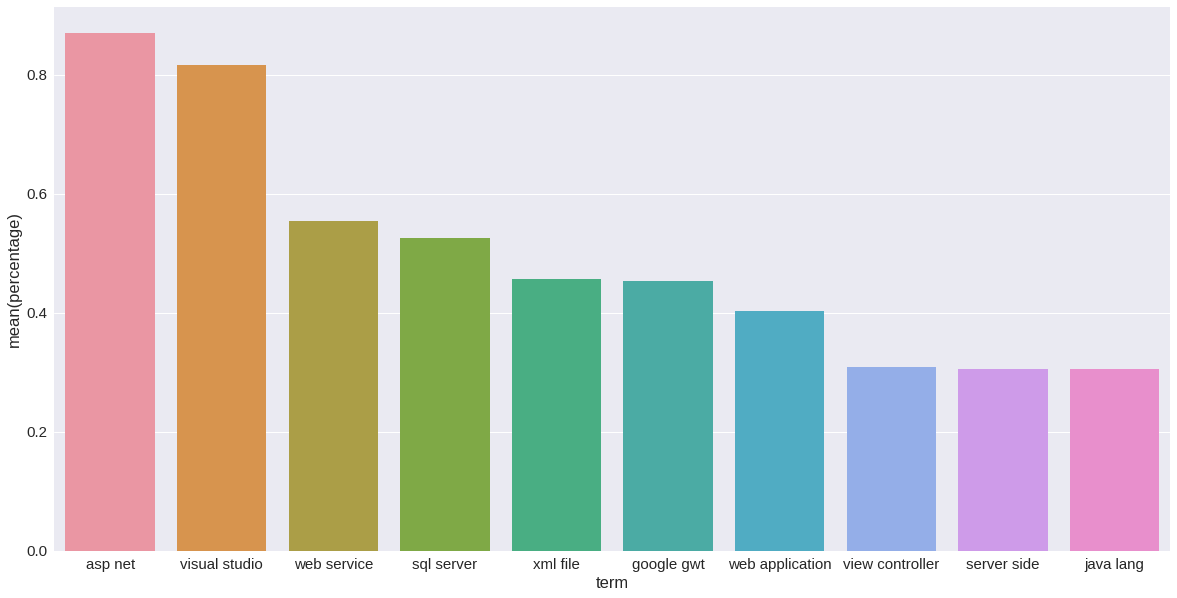

In [20]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Unanswered Questions 2010-2011

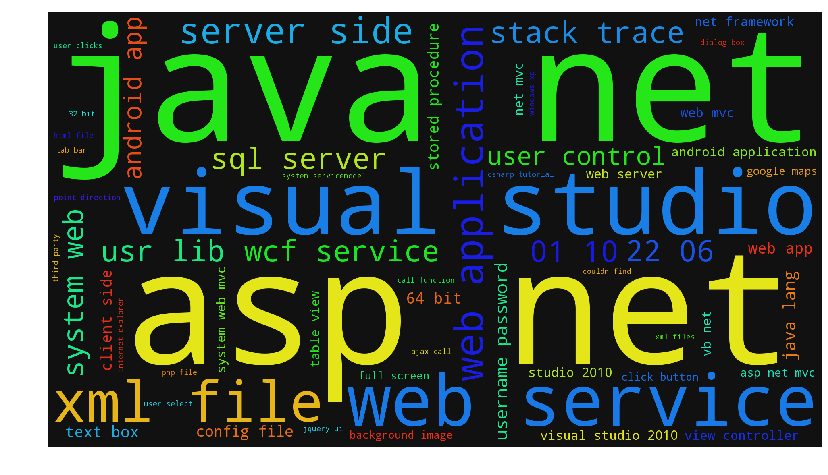

In [21]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = unanswered.loc['2010-10-15':'2011-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

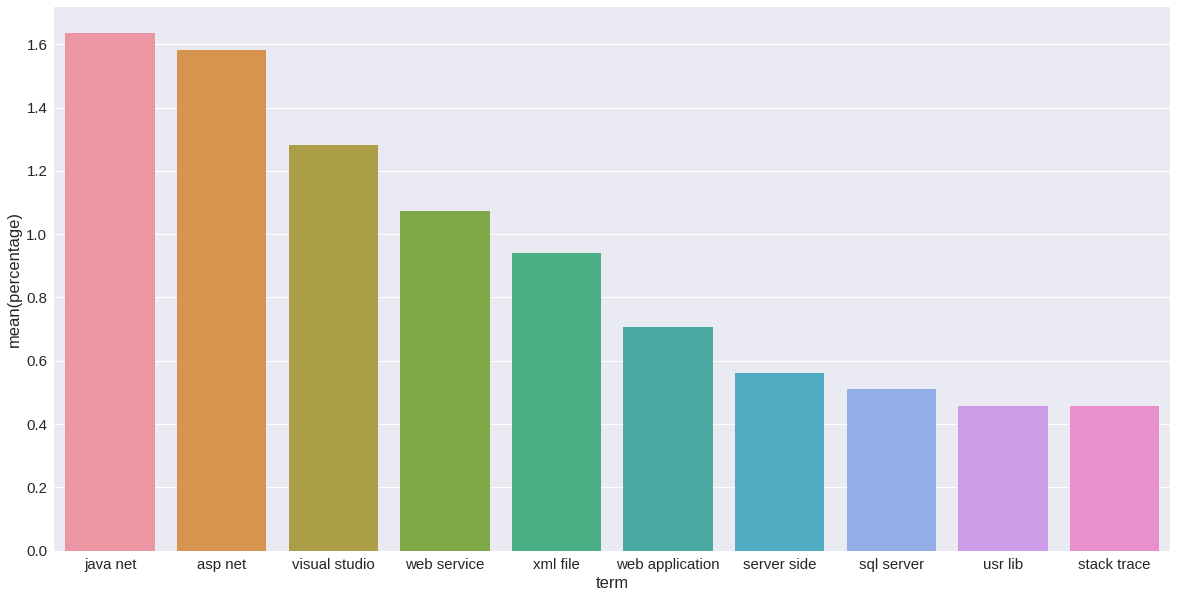

In [22]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Unanswered Questions 2009-2010

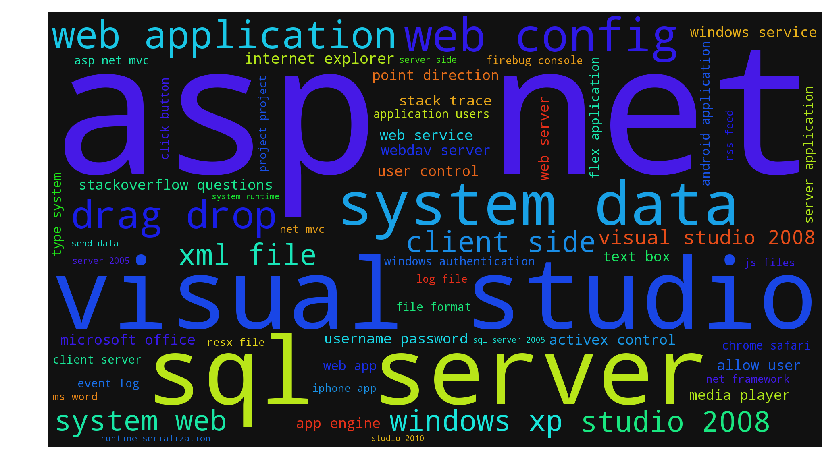

In [23]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = unanswered.loc['2009-10-15':'2010-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

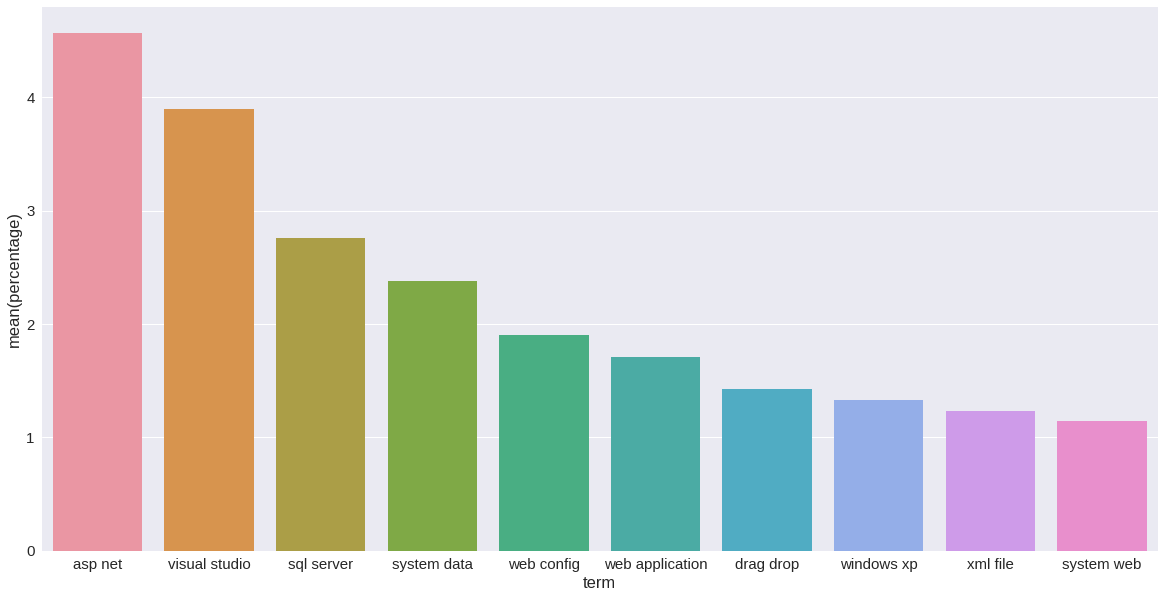

In [24]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Unanswered Questions 2008-2009

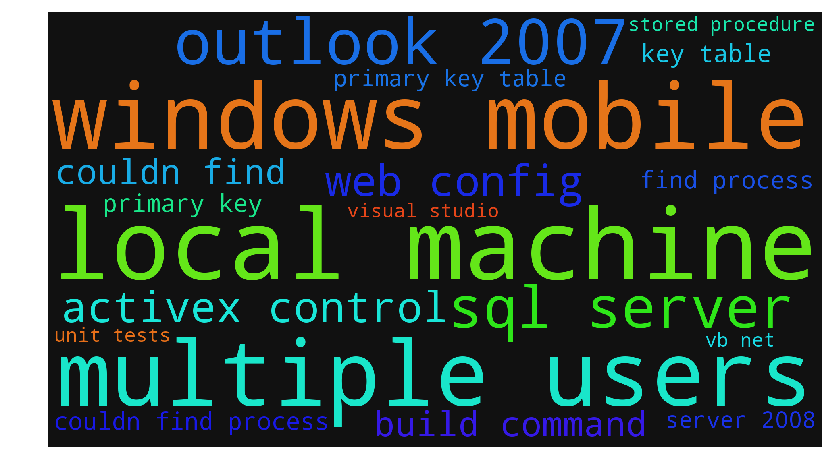

In [25]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = unanswered.loc['2008-10-15':'2009-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

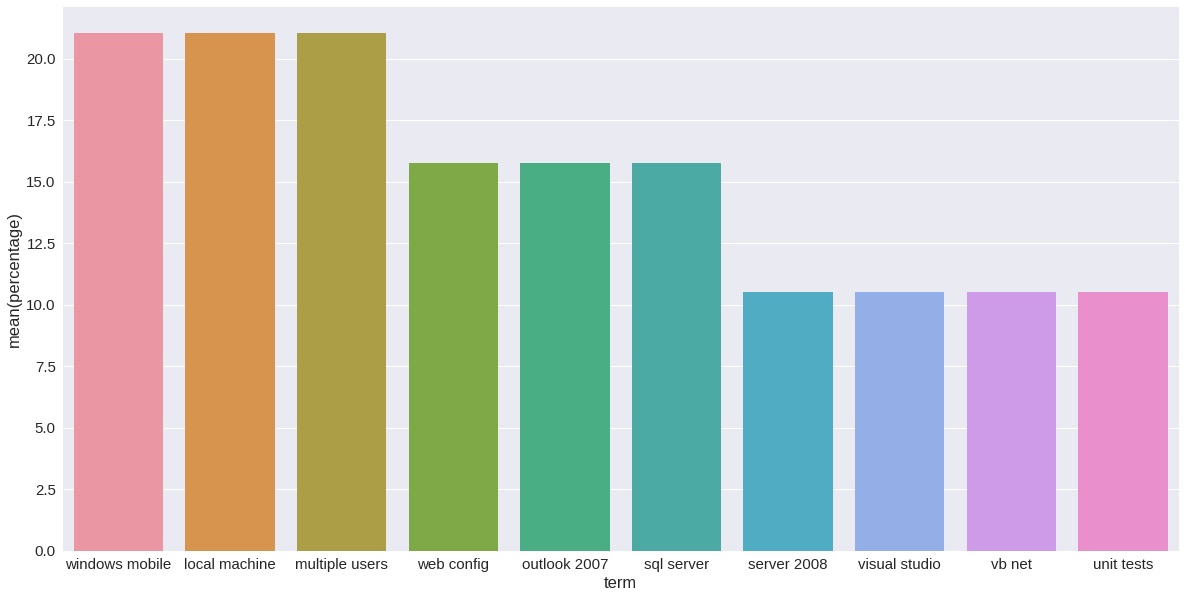

In [26]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Answered Questions 2015-2016

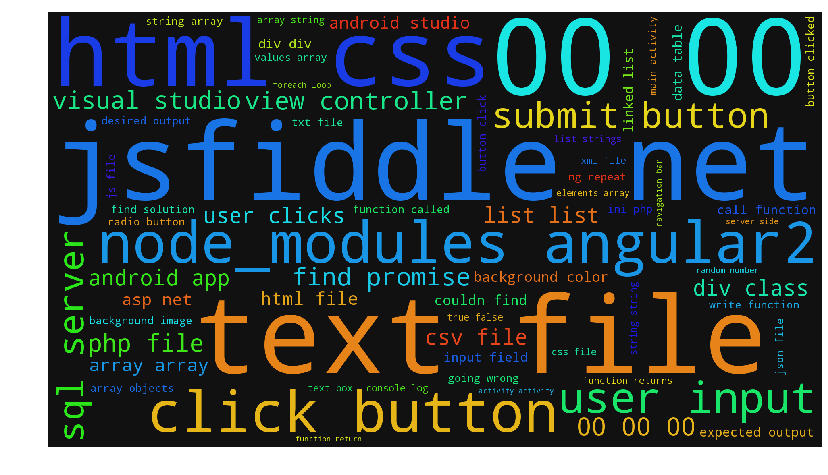

In [27]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = answered.loc['2015-10-15':'2016-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

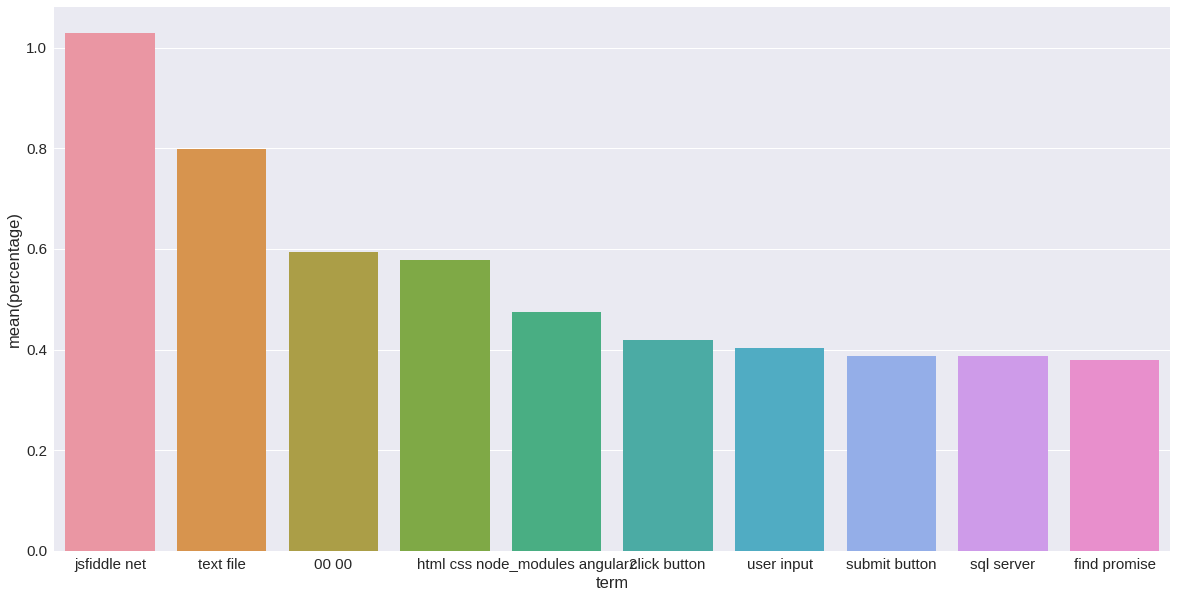

In [28]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Answered Questions 2014-2015

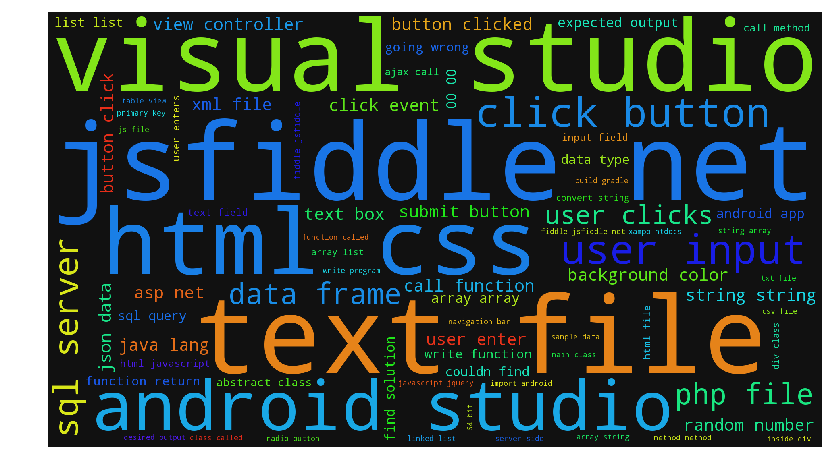

In [29]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = answered.loc['2014-10-15':'2015-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

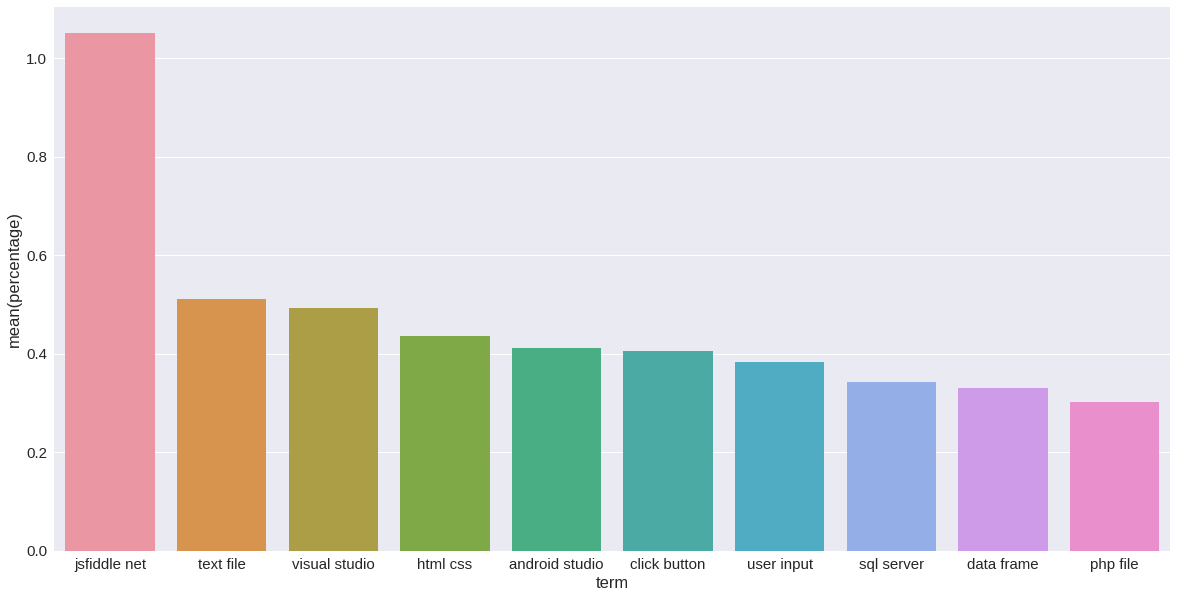

In [30]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Answered Questions 2013-2014

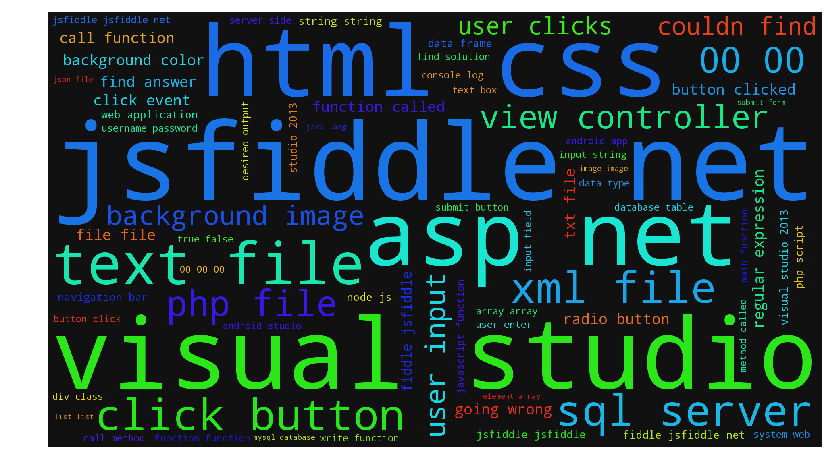

In [31]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = answered.loc['2013-10-15':'2014-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

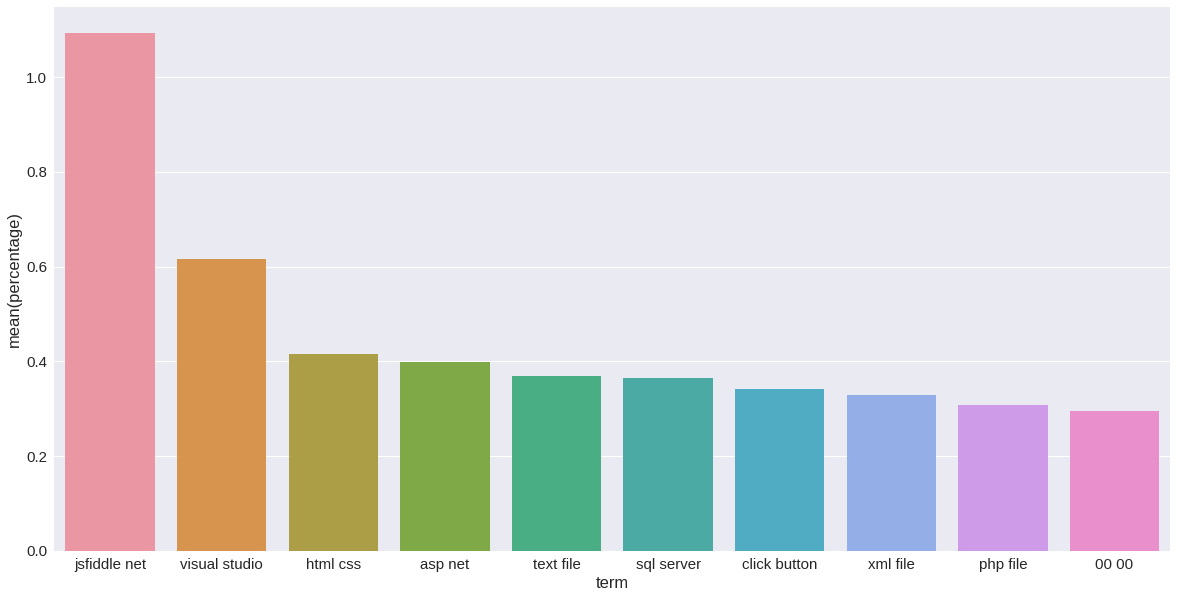

In [32]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Answered Questions 2012-2013

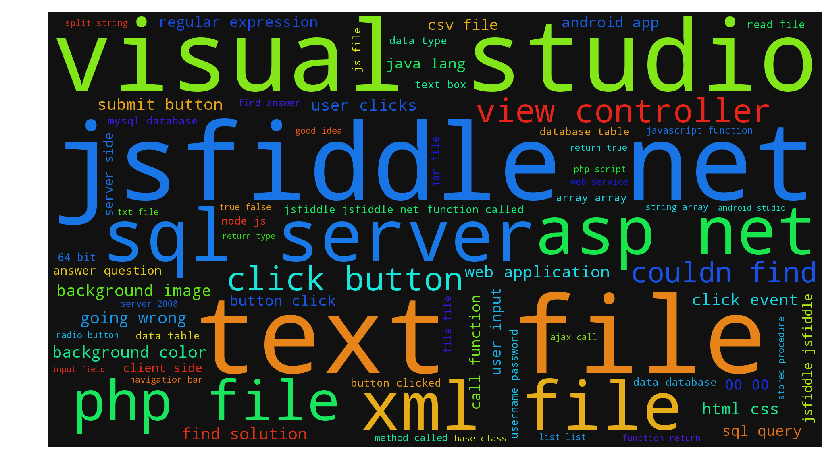

In [33]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = answered.loc['2012-10-15':'2013-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

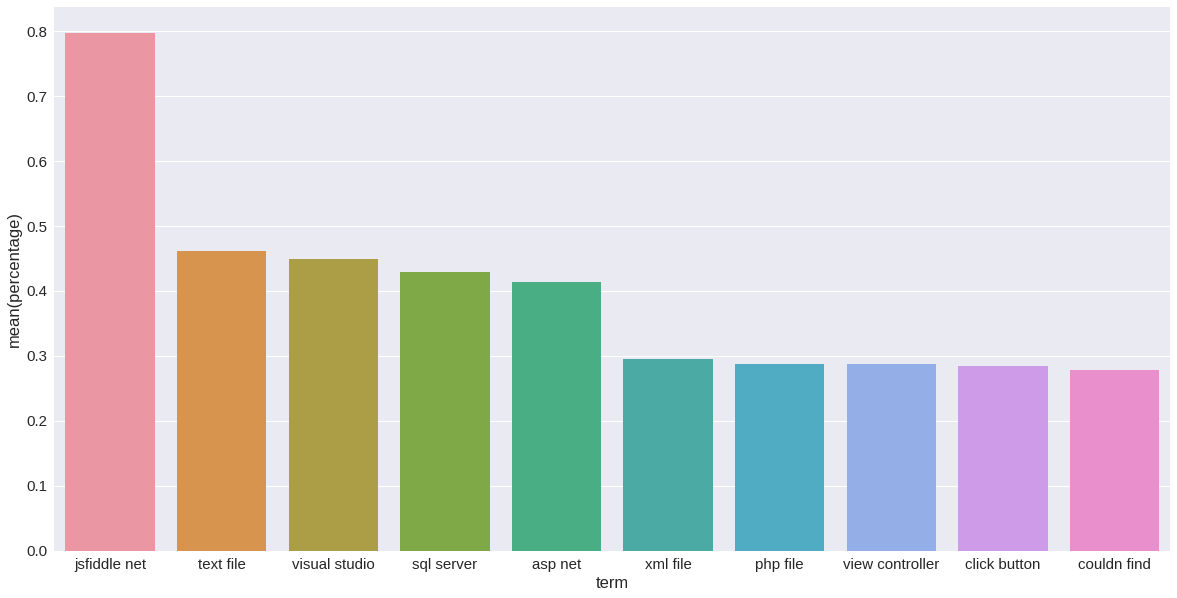

In [34]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Answered Questions 2011-2012

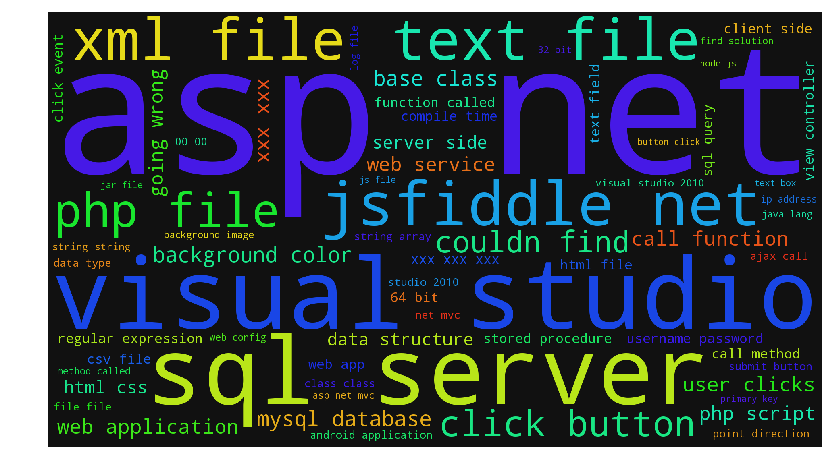

In [35]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = answered.loc['2011-10-15':'2012-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

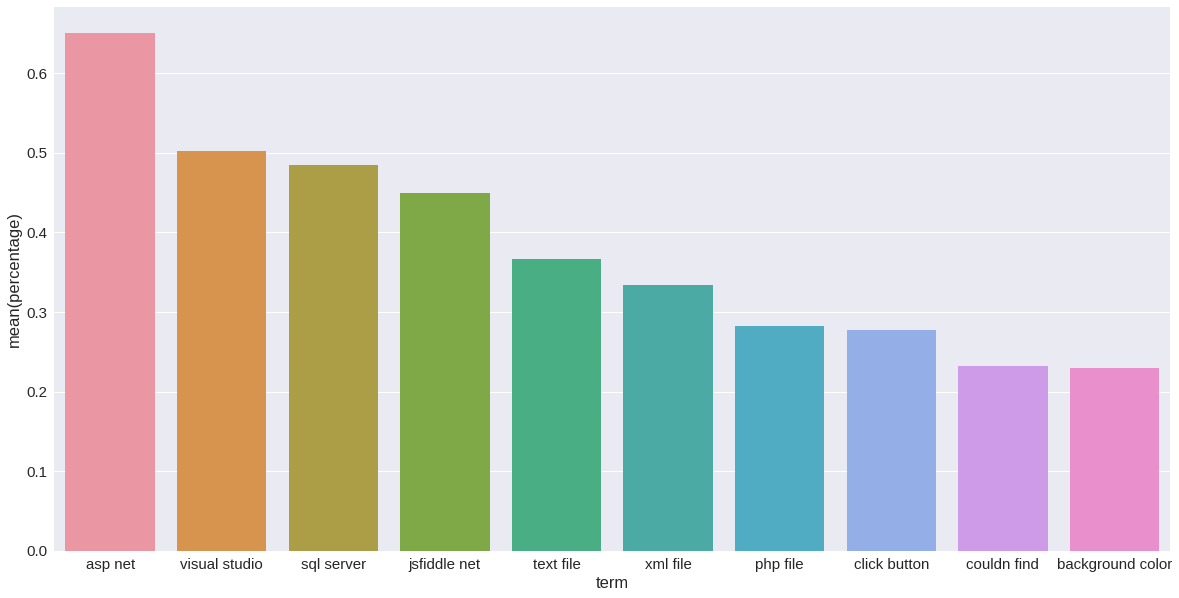

In [36]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Answered Questions 2010-2011

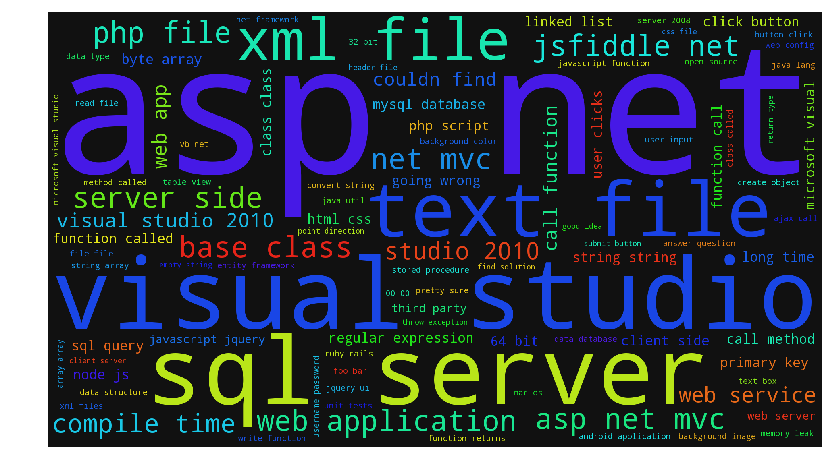

In [37]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = answered.loc['2010-10-15':'2011-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

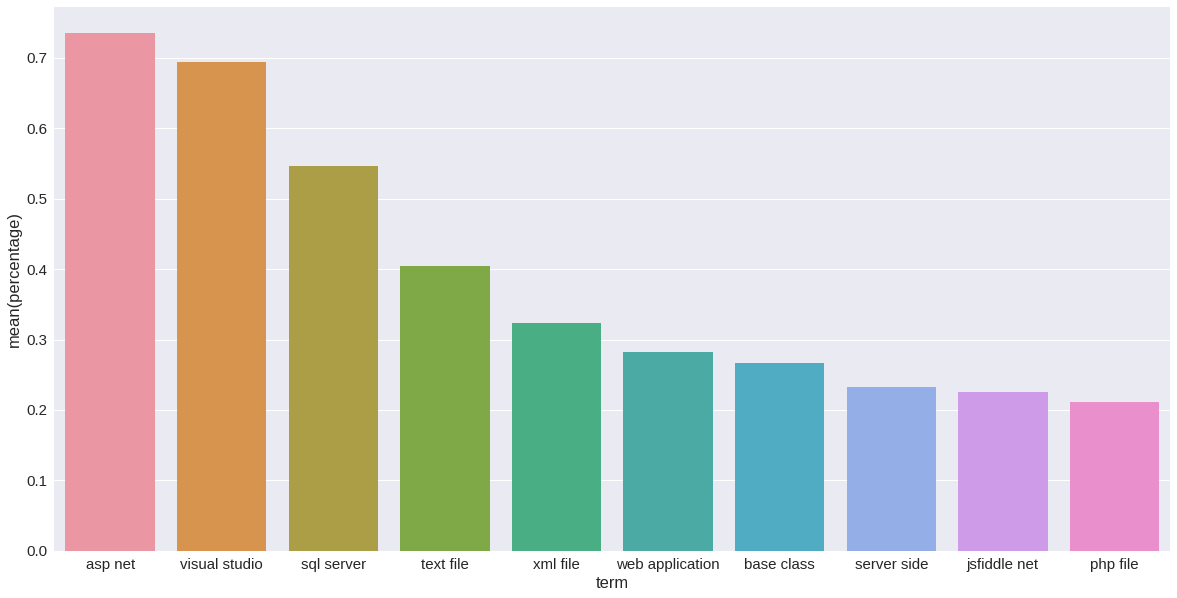

In [38]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Answered Questions 2009-2010

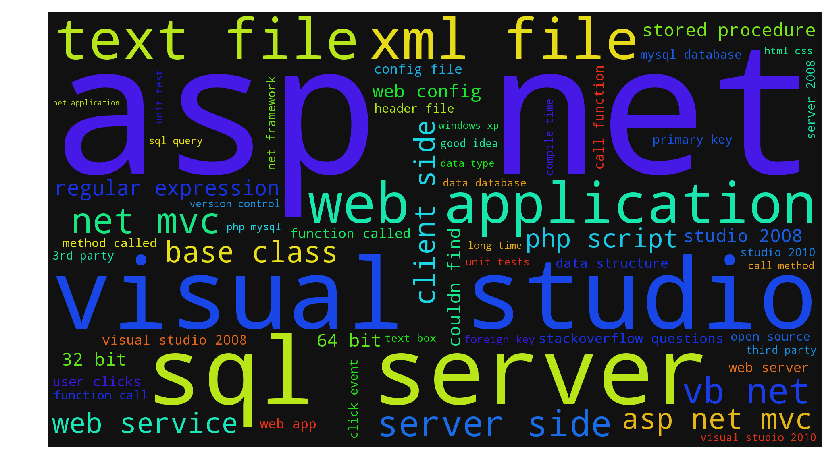

In [39]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = answered.loc['2009-10-15':'2010-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

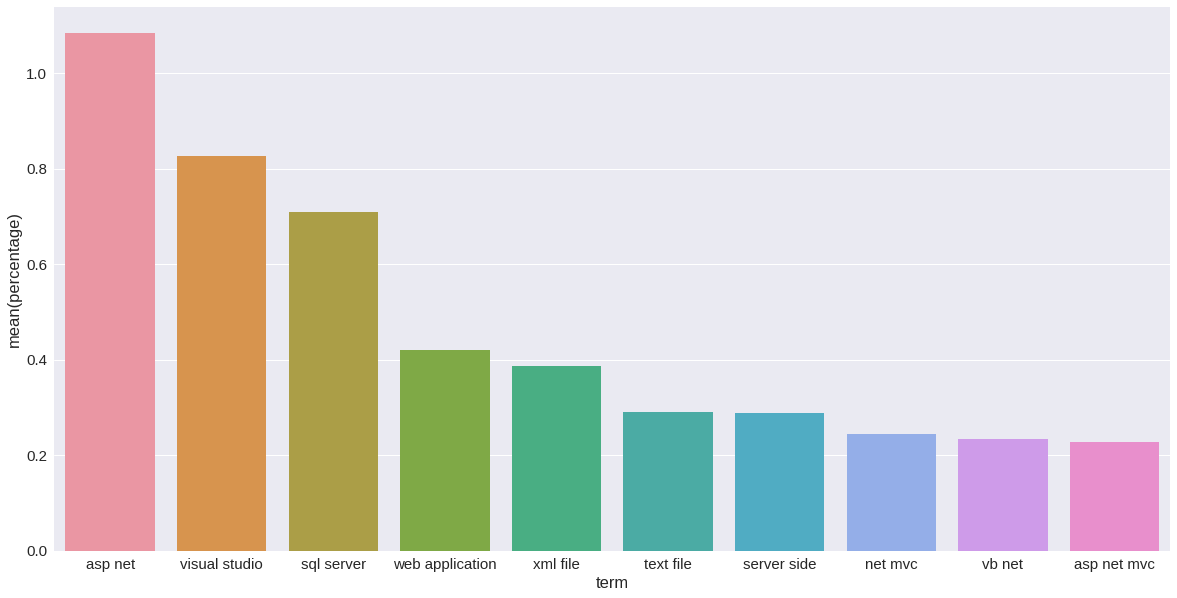

In [40]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Answered Questions 2008-2009

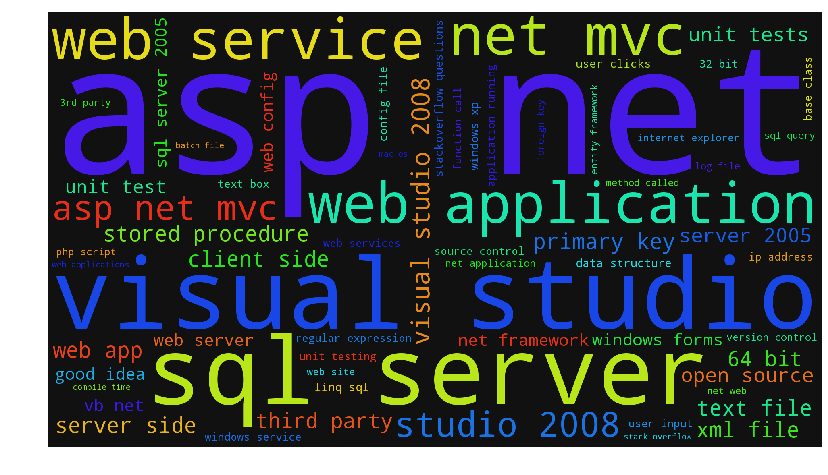

In [41]:
# General data
vect = CountVectorizer(min_df=2, max_df=0.7, stop_words=total_stop_words, ngram_range=(2,3))
input_data = answered.loc['2008-10-15':'2009-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

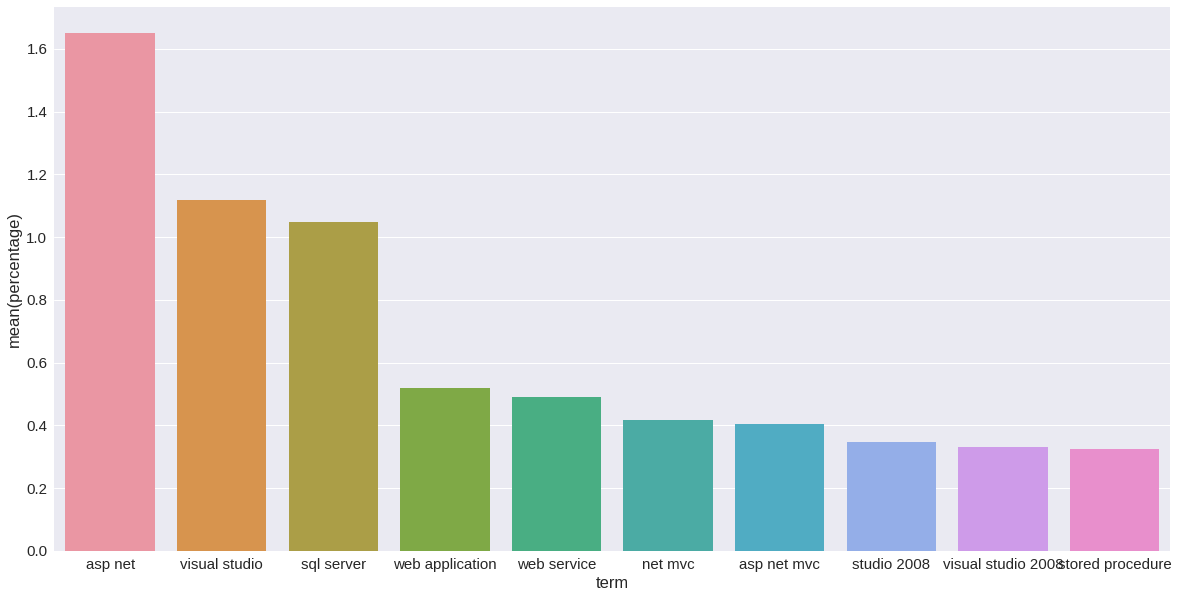

In [42]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

In [43]:
questions.shape

(1208257, 9)